In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from statsmodels.tsa.filters.hp_filter import hpfilter

In [30]:
df = pd.read_csv('bitstamp_cleaned.csv')

In [31]:
df.head()

,Unix_Timestamp,DateTime,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,12/31/2011 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,12/31/2011 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,12/31/2011 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,12/31/2011 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,01/01/2012 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [32]:
df.corr()

ValueError: could not convert string to float: '12/31/2011 07:52:00'

In [33]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [34]:
df.shape

(3330541, 9)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330541 entries, 0 to 3330540
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unix_Timestamp     int64         
 1   DateTime           datetime64[ns]
 2   Open               float64       
 3   High               float64       
 4   Low                float64       
 5   Close              float64       
 6   Volume_(BTC)       float64       
 7   Volume_(Currency)  float64       
 8   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 228.7 MB


In [36]:
df.columns

Index(['Unix_Timestamp', 'DateTime', 'Open', 'High', 'Low', 'Close',
       'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [37]:
df = df.set_index('DateTime').resample('D').last()
df = df.reset_index()
# df = df.dropna(subset=['Weighted_Price'])


In [38]:
#filling up the nan values with the closest mean
meanPrice = (df.loc[1101]['Weighted_Price'] + df.loc[1105]['Weighted_Price'])/2
df['Weighted_Price'].fillna(meanPrice, inplace=True)
df['Weighted_Price'].isna().sum()
df.loc[1102:1104]


,DateTime,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1102,2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.385
1103,2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.385
1104,2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.385


In [39]:
df.head(10)

,DateTime,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,1.325351e+09,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1,2012-01-01,1.325458e+09,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000
2,2012-01-02,1.325535e+09,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
3,2012-01-03,1.325612e+09,5.29,5.29,5.29,5.29,4.010815,21.217210,5.290000
4,2012-01-04,1.325699e+09,5.37,5.57,5.37,5.57,43.312196,235.747069,5.442972
5,2012-01-05,1.325807e+09,6.65,6.65,6.65,6.65,0.499266,3.320117,6.650000
6,2012-01-06,1.325881e+09,6.00,6.00,6.00,6.00,1.000000,6.000000,6.000000
7,2012-01-07,1.325960e+09,6.80,6.80,6.80,6.80,0.295858,2.011834,6.800000
8,2012-01-08,1.326065e+09,7.00,7.00,7.00,7.00,1.000000,7.000000,7.000000
9,2012-01-09,1.326150e+09,6.30,6.30,6.30,6.30,1.000000,6.300000,6.300000


# Trend

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price of BTC over the period')

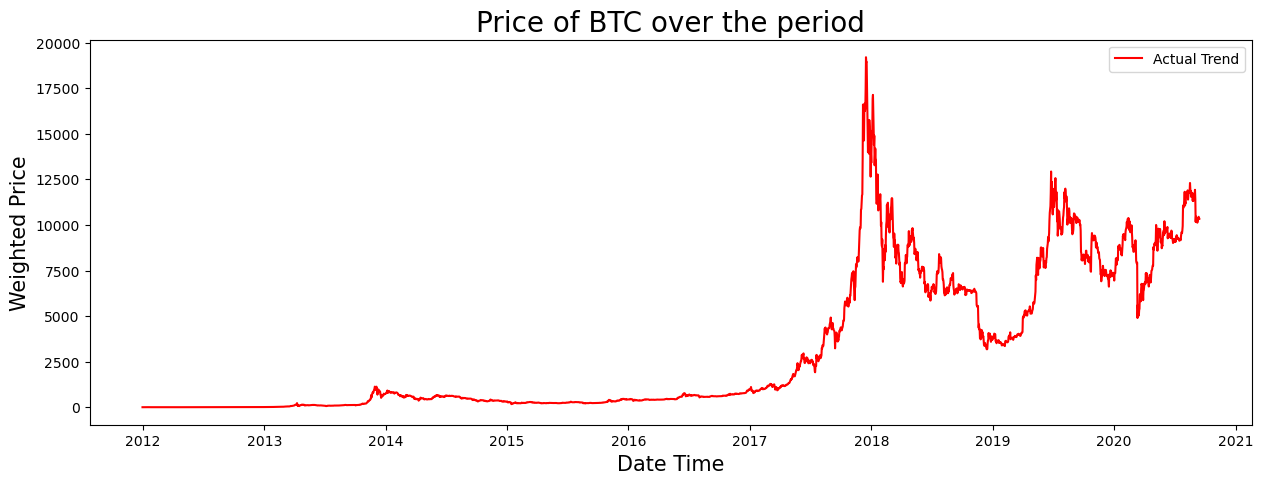

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(x='DateTime', y='Weighted_Price', data=df, legend=True, color='r', label='Actual Trend')
plt.ylabel('Weighted Price', fontsize=15)
plt.xlabel('Date Time', fontsize=15)
plt.title('Price of BTC over the period', fontsize=20)

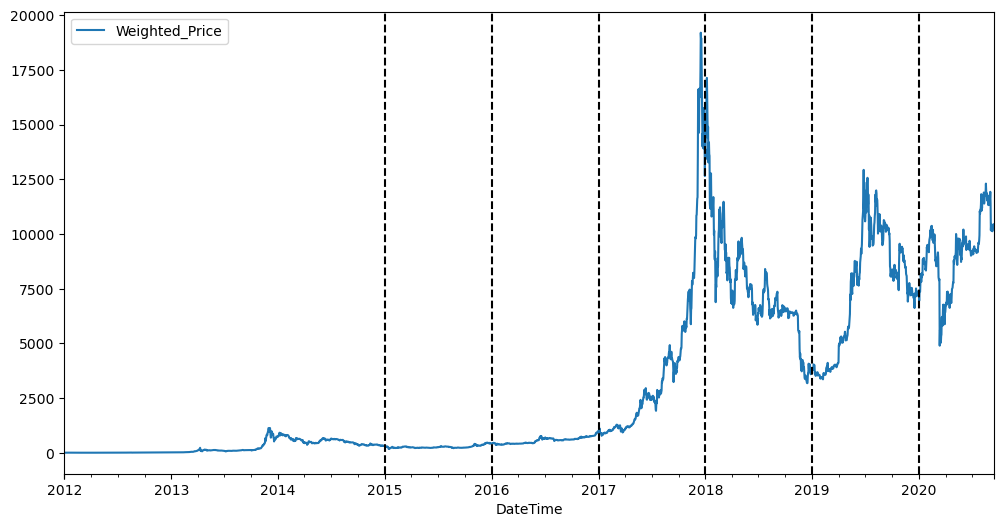

In [41]:
ax = df.plot(x='DateTime', y='Weighted_Price', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

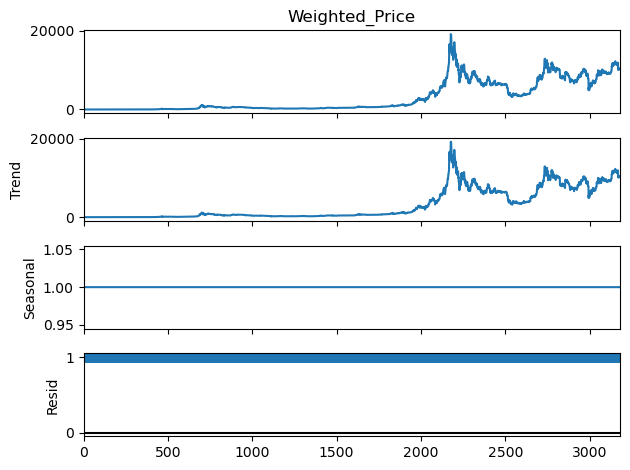

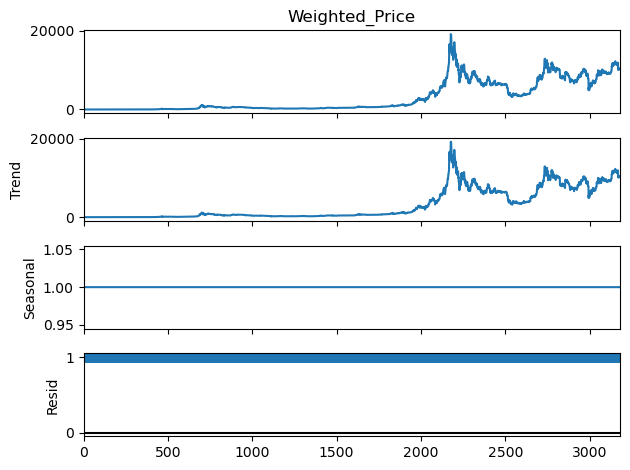

In [42]:
# from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

decompose_result = seasonal_decompose(df['Weighted_Price'],model='multiplicative',period=1)
decompose_result.plot()

# Random Walk Model

NameError: name 'matplotlib' is not defined

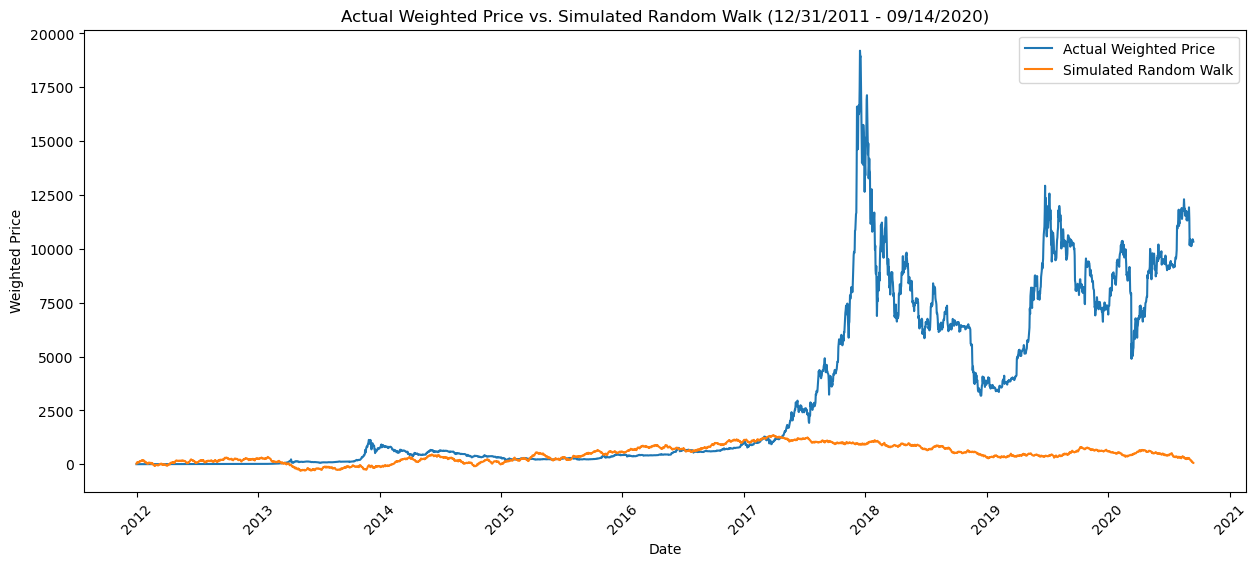

In [43]:
# Extract starting value and data length
starting_value = df['Weighted_Price'].iloc[0]  # First value in 'Weighted_Price'
data_length = len(df)  # Number of rows in the DataFrame

# Simulate random walk (modify volatility as needed)
# Here, 'volatility' controls the average step size (absolute value)
# volatility = 20  # Adjust this value to influence step sizes
volatility = 20

random_steps = np.random.normal(loc=0, scale=volatility, size=data_length)  # Normally distributed steps

# Calculate walk series (starting value + accumulated steps)
walk_series = np.cumsum(random_steps) + starting_value

# Create time series for the walk (assuming 'DateTime' column exists)
# Adjust the date format and column name if necessary
time_series = pd.to_datetime(df['DateTime'])  # Assuming 'DateTime' column exists

# Plot actual data and simulated walk
plt.figure(figsize=(15, 6))
plt.plot(time_series, df['Weighted_Price'], label='Actual Weighted Price')
plt.plot(time_series, walk_series, label='Simulated Random Walk')
plt.xlabel('Date')
plt.ylabel('Weighted Price')
plt.title('Actual Weighted Price vs. Simulated Random Walk (12/31/2011 - 09/14/2020)')
plt.legend()
# plt.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adjust time format for the x-axis labels (optional)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))  # Year-Month format

plt.tight_layout()
plt.show()


In [44]:

# Extract actual data
actual_values = df['Weighted_Price'].to_numpy()  # Convert to NumPy array

# Simulate random walk (same length as actual data)
starting_value = actual_values[0]
data_length = len(actual_values)

random_steps = np.random.normal(loc=0, scale=0.5, size=data_length)  # Adjust volatility as needed
walk_series = np.cumsum(random_steps) + starting_value

# Calculate absolute errors
absolute_errors = np.abs(actual_values - walk_series)

# Calculate squared errors
squared_errors = (actual_values - walk_series) ** 2

# Calculate MAE and RMSE
mae = np.mean(absolute_errors)
rmse = np.sqrt(np.mean(squared_errors))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3089.4367441566046
Root Mean Square Error (RMSE): 4989.25254464305


# Moving Averages Model

NameError: name 'matplotlib' is not defined

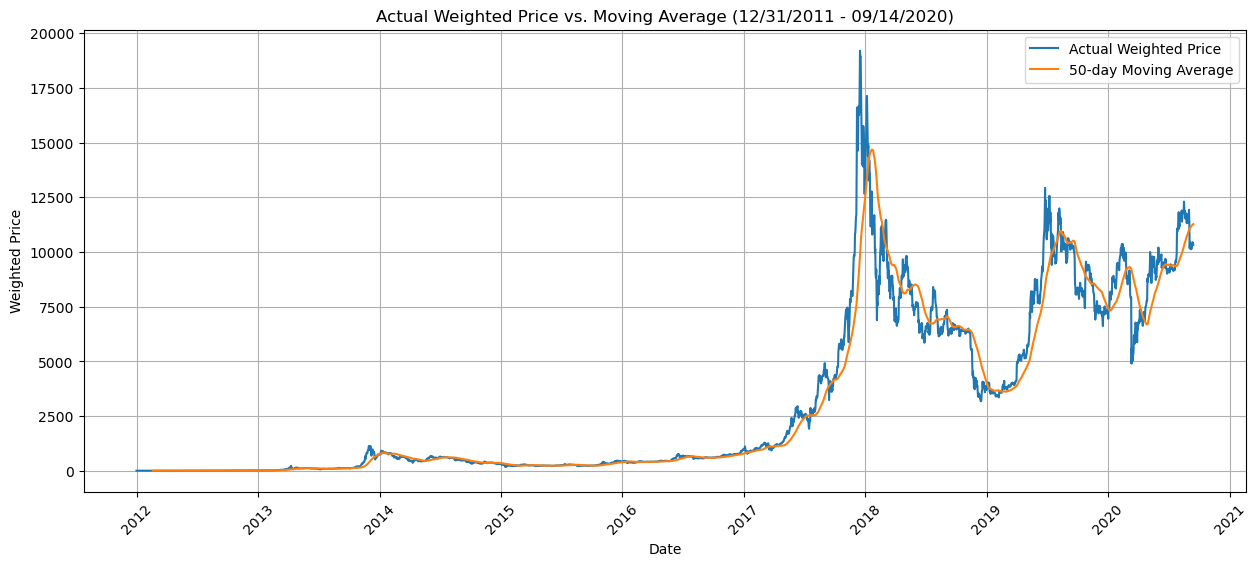

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the price column is 'Weighted_Price'

# Choose window size for moving average (experiment with different values)
window_size = 50  # Adjust this value as needed

# Calculate rolling mean (moving average)
df['Moving_Average'] = df['Weighted_Price'].rolling(window=window_size).mean()

# Plot actual data and moving average
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Weighted_Price'], label='Actual Weighted Price')
plt.plot(df['DateTime'], df['Moving_Average'], label=f'{window_size}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Weighted Price')
plt.title('Actual Weighted Price vs. Moving Average (12/31/2011 - 09/14/2020)')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adjust time format for the x-axis labels (optional)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))  # Year-Month format

# plt.tight_layout()
plt.show()


In [ ]:
window_size = 50

# Calculate rolling mean (moving average)
df['Moving_Average'] = df['Weighted_Price'].rolling(window=window_size).mean()

# Exclude initial points for error calculation (adjust window_size as needed)
actual_values = df['Weighted_Price'].iloc[window_size-1:].to_numpy()  # Exclude first window_size-1 elements
predicted_values = df['Moving_Average'].iloc[window_size-1:].to_numpy()  # Exclude first window_size-1 elements

# ... rest of the code for error calculation and printing MAE/RMSE ...

def calculate_errors(actual_values, predicted_values):
  """
  Calculates absolute errors and squared errors for a given prediction.

  Args:
      actual_values (np.array): Array of actual values.
      predicted_values (np.array): Array of predicted values.

  Returns:
      tuple: A tuple containing the MAE (mean absolute error) and RMSE (root mean square error).
  """
  absolute_errors = np.abs(actual_values - predicted_values)
  squared_errors = (actual_values - predicted_values) ** 2
  mae = np.mean(absolute_errors)
  rmse = np.sqrt(np.mean(squared_errors))
  return mae, rmse

# # Prepare data for calculations
# actual_values = df['Weighted_Price'].to_numpy()  # Convert to NumPy array

# # Calculate moving averages (assuming you already have the 'Moving_Average' column)
# predicted_values = df['Moving_Average'].to_numpy()  # Moving average is the prediction

# Calculate errors and metrics
mae, rmse = calculate_errors(actual_values, predicted_values)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


# Winter's Exponential Smoothing

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing graph'}>

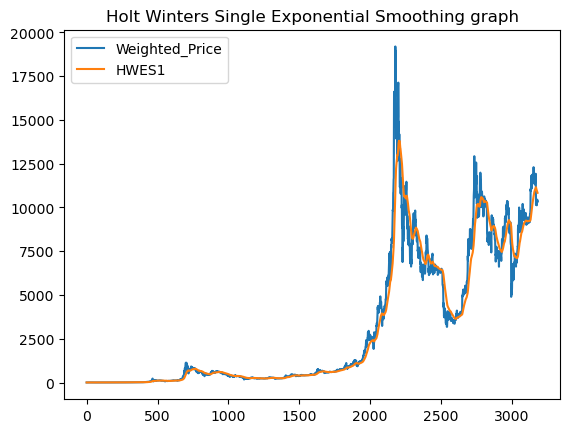

In [46]:
x = 12
alpha = 1/(2*x)
# Single exponential smoothing of the visitors data set
df['HWES1'] = SimpleExpSmoothing(df['Weighted_Price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
df[['Weighted_Price','HWES1']].plot(title='Holt Winters Single Exponential Smoothing graph')

MAE: 369.79
RMSE: 831.63
MAPE: 11.43


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Single Exponential Smoothing graph'}, xlabel='DateTime'>

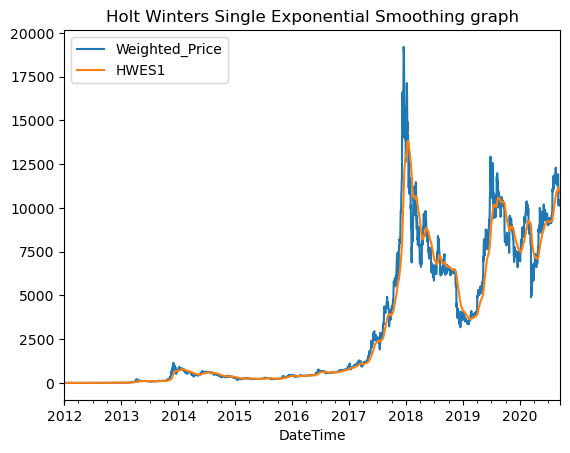

In [57]:
import statsmodels.tsa.holtwinters as hw
# Exponential smoothing parameters (adjust alpha as needed)
x = 12  # Adjust for seasonality (e.g., 12 for monthly data)
alpha = 1 / (2 * x)

# Fit the single exponential smoothing model
model = hw.SimpleExpSmoothing(df['Weighted_Price']).fit(smoothing_level=alpha, optimized=False)

# Get the smoothed values (forecasts)
df['HWES1'] = model.fittedvalues

# Calculate errors (residuals)
errors = df['Weighted_Price'] - df['HWES1']

# Calculate MAE, RMSE, and MAPE (if applicable)
mae = np.mean(np.abs(errors))
rmse = np.sqrt(np.mean(errors**2))

if not (df['Weighted_Price'] == 0).any():  # Check for zeros (avoid division by zero in MAPE)
  mape = np.mean(np.abs((errors / df['Weighted_Price']) * 100))
else:
  print("Warning: MAPE cannot be calculated due to zeros in the data.")

# Print the results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")  # Handle potential division by zero

# Plot the actual data and the smoothed values (optional)
df[['Weighted_Price', 'HWES1']].plot(title='Holt Winters Single Exponential Smoothing graph')


In [54]:
df['DateTime'].min()

KeyError: 'DateTime'

In [ ]:
df['DateTime'].max()+pd.DateOffset(days=2)

In [48]:
# import statsmodels.tsa.holtwinters as hw
# # Assuming your DataFrame is named 'df_2' and the value column is 'Weighted_Price'
# # Adjust parameters (alpha, beta, gamma) as needed
# model = hw.ExponentialSmoothing(df['Weighted_Price'], seasonal='add', seasonal_periods=7).fit(smoothing_level=0.3, smoothing_slope=1, smoothing_seasonal=0)

# # Forecast 5 days ahead (adjust 'n_periods' as needed)
# future_dates = df.index[-1] + pd.DateOffset(days=5)  # Assuming daily data, adjust for your frequency
# forecast = model.forecast(steps=5)
# forecast.rename('HW Forecast', inplace=True)  # Optional: rename forecast column

# # Assuming the original data (e.g., 'Weighted_Price') is in 'df'
# df_forecast = pd.DataFrame({'Date': future_dates, 'HW Forecast': forecast})  # Create DataFrame for forecast
# df = pd.concat([df, df_forecast.set_index('Date')], ignore_index=True)  # Append forecast to original data (optional)

import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming your data is loaded in a dataframe named 'df'

# Select the relevant columns
df_2 = df[['DateTime', 'Weighted_Price']]

# Set the date as the index
df_2.set_index('DateTime', inplace=True)

# Extract the actual price data
y = df_2['Weighted_Price']

# Define the model (trend only)
model = ExponentialSmoothing(y, trend='multiplicative', seasonal=None)

# Fit the model on the training data
model_fit = model.fit()

# Forecast for the next 5 days
forecast = model_fit.forecast(steps=5)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast.index, 'Forecast': forecast.values})

# Print the forecast for the next 5 days
print(forecast_df.to_string(index=False))


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


      Date     Forecast
2020-09-15 10334.184346
2020-09-16 10335.751156
2020-09-17 10337.318203
2020-09-18 10338.885488
2020-09-19 10340.453011


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

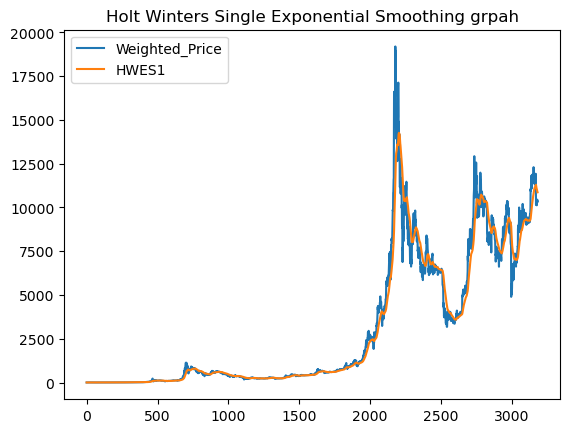

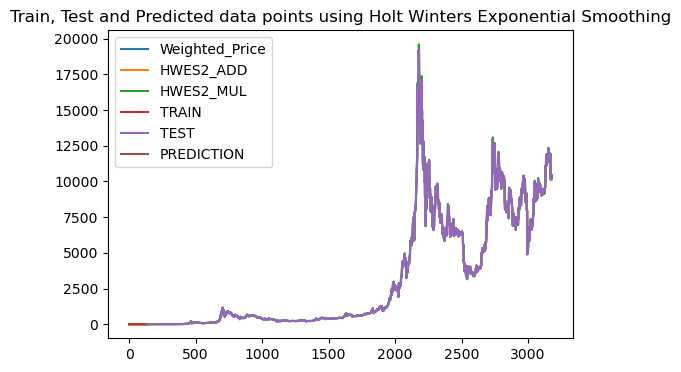

In [49]:
# Set the value of Alpha and define x as the time period
x = 10
alpha = 1/(2*x)
# Single exponential smoothing of the visitors data set
df_hw = df
df_hw['HWES1'] = SimpleExpSmoothing(df['Weighted_Price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
df_hw[['Weighted_Price','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

# Double exponential smoothing of visitors data set ( Additive and multiplicative)
df_hw['HWES2_ADD'] = ExponentialSmoothing(df_hw['Weighted_Price'],trend='add').fit().fittedvalues
df_hw['HWES2_MUL'] = ExponentialSmoothing(df_hw['Weighted_Price'],trend='mul').fit().fittedvalues
df_hw[['Weighted_Price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

# Split into train and test set
train_df = df_hw[:120]
test_df = df_hw[120:]

# Fit the model
fitted_model = ExponentialSmoothing(train_df['Weighted_Price'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(5)
train_df['Weighted_Price'].plot(legend=True,label='TRAIN')
test_df['Weighted_Price'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

In [50]:
start_date = pd.to_datetime(df['DateTime'].max())
start_date

Timestamp('2020-09-14 00:00:00')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DateTime           3181 non-null   datetime64[ns]
 1   Unix_Timestamp     3178 non-null   float64       
 2   Open               3178 non-null   float64       
 3   High               3178 non-null   float64       
 4   Low                3178 non-null   float64       
 5   Close              3178 non-null   float64       
 6   Volume_(BTC)       3178 non-null   float64       
 7   Volume_(Currency)  3178 non-null   float64       
 8   Weighted_Price     3181 non-null   float64       
 9   Moving_Average     3132 non-null   float64       
 10  HWES1              3181 non-null   float64       
 11  HWES2_ADD          3181 non-null   float64       
 12  HWES2_MUL          3181 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 323.2 KB


In [52]:
# Set the DateTime column (adjust the column name if necessary) as the index
df.set_index('DateTime', inplace=True)

# Resample by month, keeping only the 'first' observation (first day of month)
df_monthly_first = df.resample('M')['Weighted_Price'].first()

# Reset the index to obtain a separate column for 'date'
df_monthly_first = df_monthly_first.reset_index(name='Weighted_Price')

# Rename the 'DateTime' column to 'date' (optional)
df_monthly_first.rename(columns={'DateTime': 'date'}, inplace=True)

# Print the DataFrame with Weighted_Price for the first day of each month
print(df_monthly_first.to_string(index=False))


      date  Weighted_Price
2011-12-31        4.580000
2012-01-31        5.000000
2012-02-29        5.880000
2012-03-31        5.000000
2012-04-30        4.890000
2012-05-31        4.970000
2012-06-30        5.220000
2012-07-31        6.520000
2012-08-31        9.450000
2012-09-30        9.910000
2012-10-31       12.140000
2012-11-30       10.793242
2012-12-31       12.340000
2013-01-31       13.220000
2013-02-28       20.363143
2013-03-31       34.550000
2013-04-30      104.700000
2013-05-31      116.750000
2013-06-30      128.775040
2013-07-31       84.463240
2013-08-31       96.595885
2013-09-30      130.660000
2013-10-31      127.330000
2013-11-30      202.150000
2013-12-31      955.967850
2014-01-31      754.281543
2014-02-28      813.123713
2014-03-31      567.476321
2014-04-30      479.185103
2014-05-31      460.970000
2014-06-30      630.990000
2014-07-31      638.163101
2014-08-31      598.200000
2014-09-30      474.540048
2014-10-31      384.674310
2014-11-30      324.691247
2